In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import multivariate_normal as mvn
from sklearn.preprocessing import MinMaxScaler

In [77]:
# Import the dataset
faithful = pd.read_csv('faithful.csv')
x_vals = (faithful['eruptions']/10).tolist()
y_vals = faithful['waiting']/100
y_vals = y_vals.tolist()

#data = pd.read_csv('faithful.csv')
#scaler = MinMaxScaler()
#scaler.fit(data)
#data_scaled = pd.DataFrame(scaler.transform(data), columns=data.columns)

In [78]:
# We change the value of K from 2, 3, 4, 5 to obtain the different plots using different components in the multivariate mixture model

K = 3

pi = [0.5768892, 0.3327684, 0.0903425]
mus = [[0.4335336, 0.8052271],[0.1996646, 0.5438291],[0.3568136, 0.7026007]]
cov = [[[0.0013593412, 0.0003581643],[0.0003581643, 0.0028587353]],[[0.0004390206, 0.0003440483],[0.0003440483, 0.0033741135]], [[0.005536094, 0.007849662],[0.007849662, 0.013487889]]]


In [79]:
# Function to calculate the density at each datapoint
def bidimensional_mixture_normal(x, y, mu, cov, pi_k, K):
    sum = 0
    for k in range(K):
        sum = sum + pi_k[k]*mvn.pdf([x,y],mu[k],cov[k])
    return sum

In [80]:
# plot the density function for the current mixture model

density = []
for i in range(len(x_vals)):
    z = bidimensional_mixture_normal(x_vals[i], y_vals[i], mus, cov, pi, K)
    density.append(z)

pdf_list = []
x = np.linspace(0.1, 0.6, num=100)
y = np.linspace(0.3, 1, num=100)
X, Y = np.meshgrid(x,y)

pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = bidimensional_mixture_normal(X[i,j], Y[i,j], mus, cov, pi, K)

pdf_list.append(pdf)

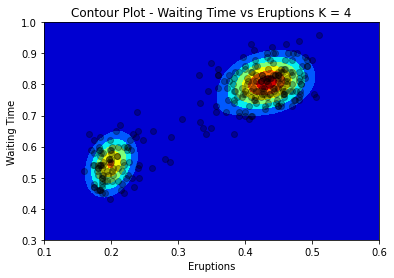

In [81]:
# Plot the contour plot for the current mixture model.

for idx, val in enumerate(pdf_list):
    plt.contourf(X, Y, val, cmap = 'jet')
    plt.xlabel("Eruptions")
    plt.ylabel("Waiting Time")
    plt.scatter(x_vals, y_vals, color = "black", alpha=0.3)
    plt.title("Contour Plot - Waiting Time vs Eruptions K = 4")
plt.show()